## Article summarization and Word Cloud creation

First, the necessary libraries need to be installed and imported. <br>
**numpy** : To work with Arrays and mathematical operations in the domain of Linear Algebra etc. <br>
**spacy** : Popular library in Natural Language Processing <br>
**re** : Important library for regular expressions <br>
**matplotlib** : To create visualizations <br>
**wordcloud** : To create Word Clouds from text <br>
**torch** : To implement machine learning algorithms <br>

**Regular Expression** : A regular expression is a sequence of characters that specifies a search pattern in text. e.g. to find out zero or one occurrences of the preceding element, **?** is used, such as: colou**?**r matches both "color" and "colour".

In [ ]:
try:
    import numpy as np
except ImportError:
    !pip install numpy
    import numpy as np
try:
    import re
except ImportError:
    !pip install regex
    import re
try:
    from wordcloud import WordCloud, STOPWORDS
except ImportError:
    !pip install wordcloud
    from wordcloud import WordCloud, STOPWORDS
try:
    import matplotlib.pyplot as plt
except ImportError:
    !pip install matplotlib
    import matplotlib.pyplot as plt
try:
    import spacy
except ImportError:
    !pip install spacy
    import spacy
try:
    nlp = spacy.load("en_core_web_sm")
except:
    !python -m spacy download en_core_web_sm
    nlp = spacy.load("en_core_web_sm")
try:
    import torch
    import torch.nn as nn
    import torch.optim as optim
    from torch.utils.data import DataLoader, Dataset
except ImportError:
    !pip install torch
    import torch
    import torch.nn as nn
    import torch.optim as optim
    from torch.utils.data import DataLoader, Dataset

### Preprocessing of data

Important functions/ subprograms are defined to use repeatedly whenever required.

In [ ]:
# to convert all the words to lower case
def casefolding(sentence):
    return sentence.lower()

# to remove the punctuation and numbers, so that only alphabets remain
def cleaning(sentence):
    return re.sub(r'[^a-z1-9]', ' ', re.sub("’", '', sentence))

# to convert all the sentences to tokens
def tokenization(sentence):
    return sentence.split()

# to convert the paragraphs into individual sentences
def sentence_split(paragraph):
    doc = nlp(paragraph)
    return [sent.text for sent in doc.sents]

The following function is created to calculate the word frequencies in the text.

In [ ]:
def word_freq(data):
    w = []
    for sentence in data:
        for words in sentence:
            w.append(words)
    bag = list(set(w))
    res = {word: w.count(word) for word in bag}
    return res

The following function is created to calculate the sentence weight based on the word frequencies in the sentence. So, the sentences having the most frequent words will have more weights.

In [ ]:
#to calculate sentence weights based on word frequencies
def sentence_weight(data, wordfreq):
    weights = []
    for sentence in data:
        temp = sum(wordfreq.get(word, 0) for word in sentence)
        weights.append(temp)
    return weights

The following function is created to convert the raw text to list of sentences and tokenized data for processing.

In [ ]:
# to process the source data into tokenized sentences."""
def create_data(source_data):
    sentence_list = sentence_split(source_data)
    data = [tokenization(cleaning(casefolding(sentence))) for sentence in sentence_list]
    data = list(filter(None, data))  # Remove empty sentences
    return sentence_list, data

The following function is created to find the word frequencies in the text and sort the dictionary based on the frequencies (in descending order).

In [ ]:
def sorted_wordfreq(data):
    wordfreq = word_freq(data)
    sorted_dict=sorted(wordfreq.items(),key=lambda x:x[1], reverse=True)
    return sorted_dict,wordfreq

### Summary of which text do you want to read? Please give the input.

In [ ]:
text = '''
In 1947, Portland, Maine, banker Andy Dufresne arrives at Shawshank State Prison to serve two consecutive life sentences for murdering his wife and her lover.
He is befriended by Ellis Boyd "Red" Redding, a contraband smuggler serving a life sentence, who procures for him a rock hammer and a large poster of Rita Hayworth.
Assigned to work in the prison laundry, Andy is frequently raped by "the Sisters" gang, led by Bogs Diamond.
In 1949, Andy overhears the captain of the guards, Byron Hadley, complaining about being taxed on an inheritance and offers to help him shelter the money legally.
After the Sisters beat Andy to near-death, Hadley cripples Bogs, who is subsequently transferred to a minimum security hospital; Andy is not attacked again.
Warden Samuel Norton assigns Andy to the prison's decrepit library, ostensibly to assist elderly inmate Brooks Hatlen, but in reality, to leverage Andy's financial expertise for managing the finances of the warden and other prison staff.
Andy also starts writing weekly letters to the state legislature, requesting funding to improve the library.
Brooks is paroled in 1954 after serving 50 years, but cannot adjust to the outside world and eventually hangs himself.
After years of Andy's ceaseless letters, the legislature sends a library donation that includes a recording of The Marriage of Figaro; Andy plays an excerpt over the public address system, experiencing a moment of personal freedom before he is punished with solitary confinement. After his release from solitary, Andy explains to a dismissive Red that hope is what gets him through his sentence.
In 1963, Norton begins exploiting prison labor for public works, profiting by undercutting skilled labor costs and receiving bribes.
Andy launders the money using the alias "Randall Stephens."
In 1965, Andy and Red befriend Tommy Williams, a young inmate convicted of burglary.
Andy helps Tommy pass his General Educational Development exam, and Tommy later reveals that his cellmate at another prison confessed to committing the murders for which Andy was convicted.
When Andy informs Norton, the warden refuses to act. Although Andy promises to keep the money laundering a secret, Norton has Hadley kill Tommy under the guise of an escape attempt and sends Andy to solitary confinement.
Norton then threatens to destroy the library, strip Andy of guard protection, and transfer him to harsher conditions if he refuses to continue with his scheme.
A dishevelled Andy is released from solitary confinement after two months.
He tells a skeptical Red that he dreams of living in Zihuatanejo, a Mexican town on the Pacific coast where he can start anew.
He asks Red to promise, once he is released, to travel to a specific hayfield near Buxton and recover a package that Andy buried there.
Red worries that Andy is suicidal, especially after learning that he asked a fellow inmate for a rope.
At the next day's roll call, the guards find Andy's cell empty.
An irate Norton throws a rock at the poster hanging on the cell wall, revealing a tunnel that Andy had dug with his rock hammer over nearly two decades.
The previous night, Andy escaped through the tunnel and prison sewage pipe, taking with him Norton's suit, shoes, and the ledger containing evidence of the money laundering and corruption at Shawshank.
While guards search for him, Andy poses as Randall Stephens and withdraws over $370,000 of the laundered money from several banks,[a] before mailing the ledger to a local newspaper.
State police arrive at Shawshank and take Hadley into custody, while Norton commits suicide to avoid arrest.
The following year, Red is paroled after serving 40 years, but struggles to adapt to life outside prison and fears that he never will.
Remembering his promise to Andy, he visits Buxton and finds a cache containing money and a letter inviting him to come to Zihuatanejo.
Red violates his parole by traveling to Mexico, admitting that he finally feels hope.
He finds Andy on a beach, and the reunited friends happily embrace.
'''

In [ ]:
input_choice = str(text)
print("Number of characters:",len(input_choice))

Number of characters: 4042


The following instructions will call the defined functions to create the tokenized data, list of sentences, find the word frequencies, create the dictionary as per word frequecies and finally rank the sentences as per the sentence weights.

In [ ]:
# Process the input data
sentence_list, data = create_data(input_choice)

# Get sorted word frequencies
sorted_dict, wordfreq = sorted_wordfreq(data)

# Calculate sentence ranks
rank = sentence_weight(data, wordfreq)

print("Number of sentences:",len(sentence_list))

Number of sentences: 30


Sample tokenized data:

In [ ]:
data[4:6]

[['after',
  'the',
  'sisters',
  'beat',
  'andy',
  'to',
  'near',
  'death',
  'hadley',
  'cripples',
  'bogs',
  'who',
  'is',
  'subsequently',
  'transferred',
  'to',
  'a',
  'minimum',
  'security',
  'hospital',
  'andy',
  'is',
  'not',
  'attacked',
  'again'],
 ['warden',
  'samuel',
  'norton',
  'assigns',
  'andy',
  'to',
  'the',
  'prison',
  's',
  'decrepit',
  'library',
  'ostensibly',
  'to',
  'assist',
  'elderly',
  'inmate',
  'brooks',
  'hatlen',
  'but',
  'in',
  'reality',
  'to',
  'leverage',
  'andy',
  's',
  'financial',
  'expertise',
  'for',
  'managing',
  'the',
  'finances',
  'of',
  'the',
  'warden',
  'and',
  'other',
  'prison',
  'staff']]

Dictionary sorted as per word frequency (in descending order):

In [ ]:
sorted_dict[:10]

[('the', 35),
 ('to', 30),
 ('andy', 28),
 ('a', 25),
 ('and', 20),
 ('he', 13),
 ('of', 13),
 ('is', 11),
 ('that', 10),
 ('his', 9)]

How many sentences in the summary do you want to read? Please give the input.

In [ ]:
n = int(input("How many sentences in the summary do you want to read? "))

How many sentences in the summary do you want to read? 2


In [ ]:
result = ''
sort_list = np.argsort(rank)[::-1][:n]
for i in range(n):
    result += '{} '.format(sentence_list[sort_list[i]])
print("\nSummary:\n", result)


Summary:
 After years of Andy's ceaseless letters, the legislature sends a library donation that includes a recording of The Marriage of Figaro; Andy plays an excerpt over the public address system, experiencing a moment of personal freedom before he is punished with solitary confinement. Warden Samuel Norton assigns Andy to the prison's decrepit library, ostensibly to assist elderly inmate Brooks Hatlen, but in reality, to leverage Andy's financial expertise for managing the finances of the warden and other prison staff.
 


## Word Cloud

The following instruction finds the stopwords in the texts so that these can be removed from the word cloud. Stop words are often irrelavant in Natural Language Processing tasks which are generally determiners (e.g a, an, the), coordinating conjunctions (e.g. for, nor, but, so), prepositions (in, under, before) etc.

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
trimmed_words = ''
trim_length=20
# trimmed_dict will consist of only a few high frequency words in the sorted dictionary
trimmed_dict = sorted_dict [:trim_length]
for i in range(trim_length):
    trimmed_words +="".join(str(trimmed_dict[i][0]))+" "

In [ ]:
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      prefer_horizontal=1.0,
                      min_font_size = 10).generate(trimmed_words)

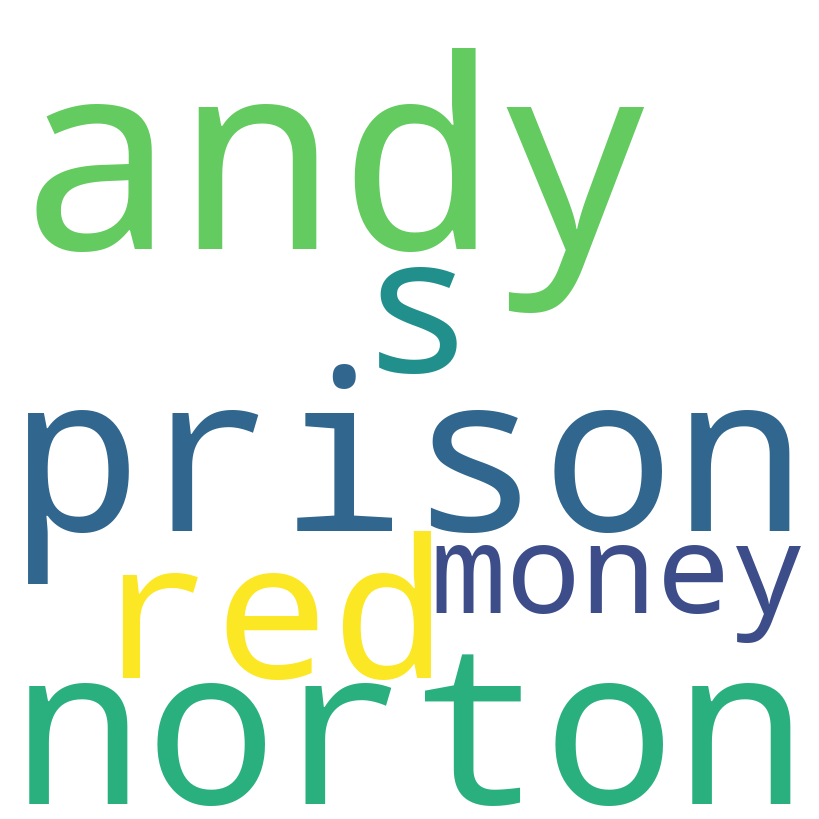

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## LSTM based Text Summerizer

Long Short-Term Memory (LSTM) is a version of recurrent neural network designed by Hochreiter & Schmidhuber in 1997. LSTM architectures are capable of learning long-term dependencies in sequential data, which makes them well-suited for tasks such as language translation, time series forecasting, speech processing etc.

Now, LSTM model will be defined:

In [ ]:
# New Class and Functions for LSTM Summarization
class LSTMModel(nn.Module):
    """Defines the LSTM model for sentence importance classification."""
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        final_output = lstm_out[:, -1, :]
        output = self.fc(final_output)
        return self.softmax(output)

To preprocess text:

In [ ]:
def preprocess_text(text):
    """Full preprocessing pipeline for input text."""
    sentences = sentence_split(text)
    cleaned_sentences = [tokenization(cleaning(casefolding(sentence))) for sentence in sentences]
    return sentences, cleaned_sentences

To prepare the dataset as desired format: <br><br>
*We make all the sentences (vectors) are of same length (equal to longest sentence) throuth padding. All unknown vocabulary are specified to remove confusion.*
<br>
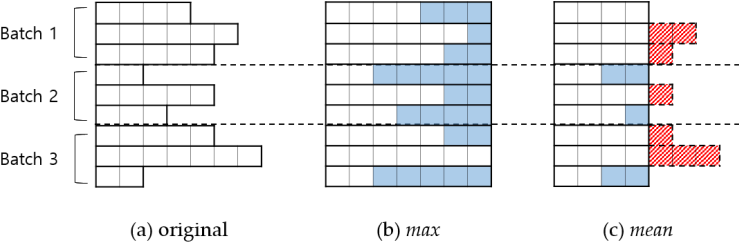



In [ ]:
class TextDataset(Dataset):
    """Dataset for sentence tokenization and padding."""
    def __init__(self, sentences, vocab):
        self.sentences = sentences
        self.vocab = vocab
        self.max_len = max(len(sentence) for sentence in sentences)

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        sentence = self.sentences[idx]
        padded_sentence = [self.vocab.get(word, self.vocab['<UNK>']) for word in sentence]
        padded_sentence = padded_sentence + [self.vocab['<PAD>']] * (self.max_len - len(padded_sentence))
        return torch.tensor(padded_sentence, dtype=torch.long)

To build the vocabulary:

In [ ]:
def build_vocab(sentences):
    """Builds a vocabulary from the tokenized sentences."""
    vocab = {'<PAD>': 0, '<UNK>': 1}
    for sentence in sentences:
        for word in sentence:
            if word not in vocab:
                vocab[word] = len(vocab)
    return vocab

To train the model:

In [ ]:
def train_model(model, dataloader, criterion, optimizer, epochs=2):
    """Trains the LSTM model."""
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for batch in dataloader:
            optimizer.zero_grad()
            predictions = model(batch)
            loss = criterion(predictions, torch.zeros(batch.size(0), dtype=torch.long))  # Assuming all sentences are not important (for simplicity)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f"Epoch {epoch + 1}, Loss: {epoch_loss / len(dataloader):.4f}")

To summerization task based on the training of the model:

In [ ]:
def generate_summary(model, sentences, vocab, top_n=2):
    """Generates a summary by selecting top N important sentences."""
    model.eval()
    sentence_scores = []
    with torch.no_grad():
        for sentence in sentences:
            input_tensor = torch.tensor(
                [vocab.get(word, vocab['<UNK>']) for word in sentence], dtype=torch.long
            ).unsqueeze(0)
            score = model(input_tensor)
            sentence_scores.append(score[0][1].item())  # Importance score
    top_sentence_indices = np.argsort(sentence_scores)[-top_n:]
    summary = " ".join(original_sentences[i] for i in top_sentence_indices)
    return summary

Now, the processes will begin:

In [ ]:
# Preprocess text
original_sentences, tokenized_sentences = preprocess_text(text)

# Build vocabulary
vocab = build_vocab(tokenized_sentences)

# Prepare dataset
dataset = TextDataset(tokenized_sentences, vocab)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

The model parameters defined for training:

In [ ]:
# Model parameters
vocab_size = len(vocab)
embedding_dim = 50
hidden_dim = 100
output_dim = 2  # For binary classification (important or not)
model = LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Finally, the training is started:

In [ ]:
# Train the model
train_model(model, dataloader, criterion, optimizer, epochs=8)

Epoch 1, Loss: 0.4543
Epoch 2, Loss: 0.3231
Epoch 3, Loss: 0.3143
Epoch 4, Loss: 0.3138
Epoch 5, Loss: 0.3137
Epoch 6, Loss: 0.3136
Epoch 7, Loss: 0.3136
Epoch 8, Loss: 0.3135


Now, to generate the summary based on the trained LSTM model:

In [ ]:
# Generate Summary
def generate_summary(model, sentences, vocab, top_n=3):
    model.eval()
    sentence_scores = []
    with torch.no_grad():
        for sentence in sentences:
            input_tensor = torch.tensor(
                [vocab.get(word, vocab['<UNK>']) for word in sentence], dtype=torch.long
            ).unsqueeze(0)
            score = model(input_tensor)
            sentence_scores.append(score[0][1].item())  # Importance score
    top_sentence_indices = np.argsort(sentence_scores)[-top_n:]
    summary = " ".join(original_sentences[i] for i in top_sentence_indices)
    return summary

summary = generate_summary(model, tokenized_sentences, vocab, top_n=3)
print("\nSummary:\n", summary)


Summary:
 In 1963, Norton begins exploiting prison labor for public works, profiting by undercutting skilled labor costs and receiving bribes.
 
In 1947, Portland, Maine, banker Andy Dufresne arrives at Shawshank State Prison to serve two consecutive life sentences for murdering his wife and her lover.
 When Andy informs Norton, the warden refuses to act.


##Summerization using transformers

In 2017, a ground-breaking research paper "Attention is All You Need" was published by Google Research, which utilized Transformer mechanism for efficient translation. From then on, transformers have changed the world and the field of AI, including one of the most popular names in AI now-a-days "ChatGPT".

In [ ]:
#First, let's install the necessary libraries
!pip install datasets evaluate transformers[sentencepiece]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization")
#summerizer = pipeline("summarization", model="google-t5/t5-small")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cpu


### **Now, without even training, just by using pre-trained transformer model, summerization is possible which is even better than previous two summeries**

In [ ]:
summarizer(input_choice)
#summarizer(input_choice,max_length = 60)

[{'summary_text': ' Banker Andy Dufresne is sent to Shawshank State Prison to serve two consecutive life sentences for murdering his wife and her lover . He is befriended by Ellis Boyd "Red" Redding, a contraband smuggler serving a life sentence, who procures for him a rock hammer and a large poster of Rita Hayworth . In 1965, Andy and Red befriended Tommy Williams, a young inmate convicted of burglary, and Tommy later reveals that his cellmate at another prison confessed to committing the murders for which Andy was convicted . In 1963, the warden exploited prison labor for public works, profiting by undercutting skilled labor costs and receiving bribes .'}]

#### Additional Resources:

1. [Numpy Documentation](https://numpy.org/doc/)
2. [Matplotlib Documentation](https://matplotlib.org/stable/index.html)
3. [Spacy documentation](https://spacy.io/usage/spacy-101)
4. [Regular Expression library](https://docs.python.org/3/library/re.html)
5. [Word Cloud documentation](https://pypi.org/project/wordcloud/)
6. [PyTorch documentation](https://pytorch.org/docs/stable/index.html)
7. [HuggingFace](https://huggingface.co/)
8. [HuggingFace Learning Resources](https://huggingface.co/learn)
9. [Newspaper3k: Article scraping & curation](https://newspaper.readthedocs.io/en/latest/)

*Created by [Prachuryya Kaushik](https://www.iitg.ac.in/cse/student-pages/k.prachuryya) under the guidance of [Prof. Ashish Anand](https://www.iitg.ac.in/anand.ashish//)*